# Step 0: Import the necessary libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Step 1: Import Data

In [2]:
try:
    file = pd.read_csv("student-por.csv")
except FileNotFoundError:
    print("File Not Found")

print(file.columns)
file.head(5)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Colmns:
- 1. **school**
- 2. **sex**
- 3. **age**
- 4. **address**
- 5. **famsize**
- 6. **Pstatus**
- 7. **Medu**
- 8. **Fedu**
- 9. **Mjob**
- 10. **Fjob**
- 11. **reason**
- 12. **guardian**
- 13. **traveltime**
- 14. **studytime**
- 15. **failures**
- 16. **schoolsup**
- 17. **famsup**
- 18. **paid**
- 19. **activities**
- 20. **nursery**
- 21. **higher**
- 22. **internet**
- 23. **romantic**
- 24. **famrel**
- 25. **freetime**
- 26. **goout**
- 27. **Dalc**
- 28. **Walc**
- 29. **health**
- 30. **absences**
- 31. **G1**
- 32. **G2**
- 33. **G3**
 
### Important:


- 'sex'
- 'age'
- 'address'
- 'famsize'
- 'Pstatus'
- 'Medu'
- 'Fedu'
- 'Mjob'
- 'Fjob'
- 'guardian'
- 'studytime'
- 'failures'
- 'G1', 'G2'

## Target:
- 'G3'

# Step 2: Clean the Data

In [3]:
n_file = file.drop(columns=['school', 'reason', 'traveltime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'] , axis=1)
n_file.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,2,0,0,11,11
1,F,17,U,GT3,T,1,1,at_home,other,father,2,0,9,11,11
2,F,15,U,LE3,T,1,1,at_home,other,mother,2,0,12,13,12
3,F,15,U,GT3,T,4,2,health,services,mother,3,0,14,14,14
4,F,16,U,GT3,T,3,3,other,other,father,2,0,11,13,13


In [4]:
succeeded = []
for g3 in n_file['G3'].values:
    if g3 < 10:
        succeeded.append(0)
    else:
        succeeded.append(1)

# Using 'succeeded' as the column name and equating it to the list
n_file = n_file.assign(succeeded=succeeded)
n_file.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,G1,G2,G3,succeeded
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,2,0,0,11,11,1
1,F,17,U,GT3,T,1,1,at_home,other,father,2,0,9,11,11,1
2,F,15,U,LE3,T,1,1,at_home,other,mother,2,0,12,13,12,1
3,F,15,U,GT3,T,4,2,health,services,mother,3,0,14,14,14,1
4,F,16,U,GT3,T,3,3,other,other,father,2,0,11,13,13,1


In [5]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian']:
    n_file[col] = pd.factorize(n_file[col])[0]
    
n_file.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,G1,G2,G3,succeeded
0,0,18,0,0,0,4,4,0,0,0,2,0,0,11,11,1
1,0,17,0,0,1,1,1,0,1,1,2,0,9,11,11,1
2,0,15,0,1,1,1,1,0,1,0,2,0,12,13,12,1
3,0,15,0,0,1,4,2,1,2,0,3,0,14,14,14,1
4,0,16,0,0,1,3,3,2,1,1,2,0,11,13,13,1


# Step 3: Split the Data into Training/testing

In [6]:
X = np.asanyarray(n_file[['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'guardian', 'studytime', 'failures', 'G1', 'G2']])
y = np.asanyarray(n_file[["succeeded"]])
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.83337685,  1.03169516, -0.66018233, -0.64817536, -2.66692707,
         1.31021563,  1.54071544, -1.55645254, -1.64373691, -0.60574253,
         0.08365295, -0.37430512, -4.15547029, -0.19581961],
       [-0.83337685,  0.21013668, -0.66018233, -0.64817536,  0.37496338,
        -1.33603938, -1.18883229, -1.55645254, -0.53940435,  1.06713791,
         0.08365295, -0.37430512, -0.87456978, -0.19581961],
       [-0.83337685, -1.43298028, -0.66018233,  1.54279238,  0.37496338,
        -1.33603938, -1.18883229, -1.55645254, -0.53940435, -0.60574253,
         0.08365295, -0.37430512,  0.21906372,  0.49113675],
       [-0.83337685, -1.43298028, -0.66018233, -0.64817536,  0.37496338,
         1.31021563, -0.27898305, -0.75475595,  0.56492821, -0.60574253,
         1.29011438, -0.37430512,  0.94815272,  0.83461493],
       [-0.83337685, -0.6114218 , -0.66018233, -0.64817536,  0.37496338,
         0.42813063,  0.63086619,  0.04694063, -0.53940435,  1.06713791,
         0.08365295, -0.37

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (519, 14) (519, 1)
Test set: (130, 14) (130, 1)


# Step 4: Create a Model

In [8]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR

LogisticRegression(C=0.01, solver='liblinear')

# Step 5: Train the Model

In [9]:
LR.fit(X_train,y_train)
LR

/home/mehdi/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

# Step 6: Make Predictions

In [13]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.1899273 , 0.8100727 ],
       [0.15175925, 0.84824075],
       [0.50133369, 0.49866631],
       [0.07441051, 0.92558949],
       [0.33561534, 0.66438466],
       [0.30141084, 0.69858916],
       [0.20866211, 0.79133789],
       [0.30881014, 0.69118986],
       [0.37517409, 0.62482591],
       [0.34679121, 0.65320879],
       [0.31077364, 0.68922636],
       [0.34976272, 0.65023728],
       [0.46993238, 0.53006762],
       [0.38863286, 0.61136714],
       [0.2224306 , 0.7775694 ],
       [0.15497059, 0.84502941],
       [0.18188932, 0.81811068],
       [0.12756878, 0.87243122],
       [0.27194842, 0.72805158],
       [0.33206894, 0.66793106],
       [0.39374405, 0.60625595],
       [0.58488522, 0.41511478],
       [0.07023929, 0.92976071],
       [0.52362901, 0.47637099],
       [0.23040204, 0.76959796],
       [0.22995998, 0.77004002],
       [0.14329989, 0.85670011],
       [0.24970489, 0.75029511],
       [0.24132047, 0.75867953],
       [0.30713598, 0.69286402],
       [0.

# Step 7: Evaluation and Improve

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.62      0.81      0.70        16
           1       0.97      0.93      0.95       114

    accuracy                           0.92       130
   macro avg       0.80      0.87      0.83       130
weighted avg       0.93      0.92      0.92       130

Confusion matrix, without normalization
[[106   8]
 [  3  13]]


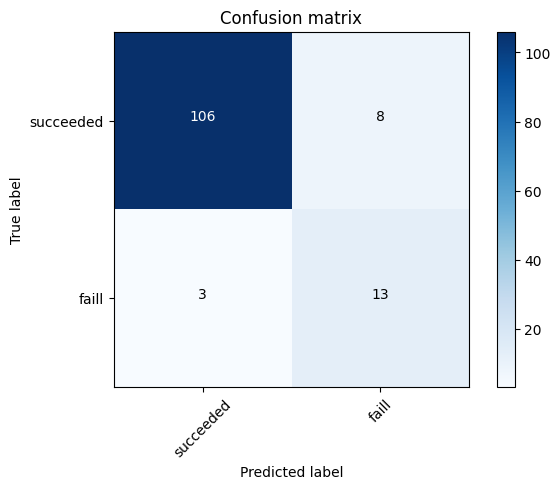

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['succeeded','faill'],normalize= False,  title='Confusion matrix')

In [16]:
print(f"f1_score: {f1_score(y_test, yhat, average='weighted')}")
print(f"jaccard_score: {jaccard_score(y_test, yhat, pos_label=1)}")

f1_score: 0.9201532681353309
jaccard_score: 0.905982905982906
